In [17]:
import pandas as pd 
import numpy as np 
from torch_mist.decomposition import MID
from torch.optim import AdamW
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation, PillowWriter
import pickle
from glob2 import glob

In [92]:
def Get_MID(dir,moth,condition):
    ex = pd.read_csv(dir+moth+"_"+condition+".csv")
    Y = ex["stim"].values
    X = ex[["fx","ty","tz"]].values
    X_zscored = (X-X.mean(axis=0)) / X.std(axis=0)

    lin_mid = MID(1,whiten=False,proj_params={'hidden_dims':[]},model_params={'estimator_name':'infonce'})
    lin_mid.fit(X_zscored,Y,early_stopping=False,patience=2,optimizer_class=AdamW,max_epochs=25)

    lat = lin_mid.transform(X)[:,0]
    
    projs = lin_mid.proj.weight.detach().cpu().numpy()

    out_dict = {
    'moth' : "2024_11_08",
    'condition' : "high",
    'model' : lin_mid,
    'X' : X,
    'Y' : Y, 
    'lat' : lat,
    'proj' : projs
    }

    return out_dict



In [13]:
out = Get_MID("/home/doshna/Documents/PHD/data/fatties/Muscle_Time_Series/","2024_11_08","HIGH")

[Info]: batch_size is not specified, using batch_size=64 by default.


In [19]:
datadir = "/home/doshna/Documents/PHD/data/fatties/Muscle_Time_Series/"
files = glob(f"{datadir}/*.csv")

In [31]:
moths = set([f.split("/")[-1][:10] for f in files])
conditions = set(["LOW","HIGH"])

In [93]:
out = {}
for m in moths:
    out[m] = {}
    for c in conditions:
        out[m][c] = Get_MID(datadir,m,c)

with open('MID_cache_xry.pkl','wb') as f:
    pickle.dump(out,f)

[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specified, using batch_size=64 by default.
[Info]: batch_size is not specifie

In [ ]:
out['2024_11_07']

dict_keys(['HIGH', 'LOW'])

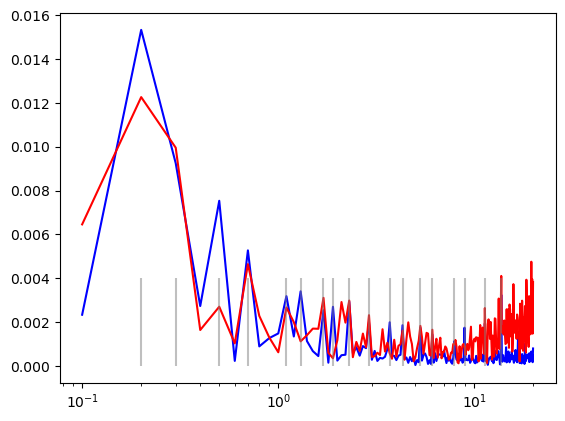

In [95]:
fr = np.fft.fftfreq(100000,1/10000)
freqqs = np.array([0.200, 0.300, 0.500, 0.700, 1.100, 1.300, 1.700, 1.900, 2.300, 2.900, 3.700, 4.300, 5.300, 6.100, 7.900, 8.900, 11.30, 13.70])

plt.plot(fr[1:200], np.abs(np.fft.fft((out['2024_11_08']['LOW']['lat'])))[1:200]/1e5,color='blue')
plt.plot(fr[1:200], np.abs(np.fft.fft((out['2024_11_08']['HIGH']['lat'])))[1:200]/1e5,color='red')

plt.vlines(freqqs, 0, 0.004, color="grey", label="freqs", alpha=0.5)
plt.xscale("log")

In [48]:
fr

array([ 0.e+00,  1.e-09,  2.e-09, ..., -3.e-09, -2.e-09, -1.e-09])

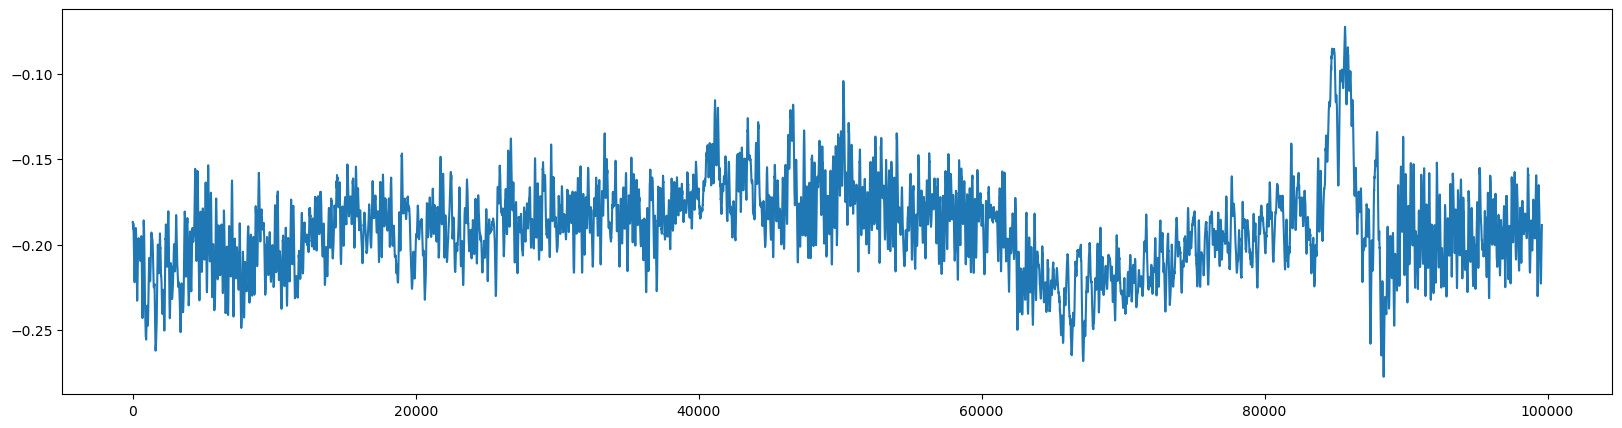

In [16]:
winsize= 400
window = np.ones(winsize) / winsize
smooth = np.convolve(out['lat'],window,mode='valid')
fig = plt.figure(figsize=(20,5))
sc = plt.plot(smooth)
plt.xlabel="time (s)"
plt.ylabel= "MID[1]"
plt.show()

In [42]:
smooth.shape

(99601,)

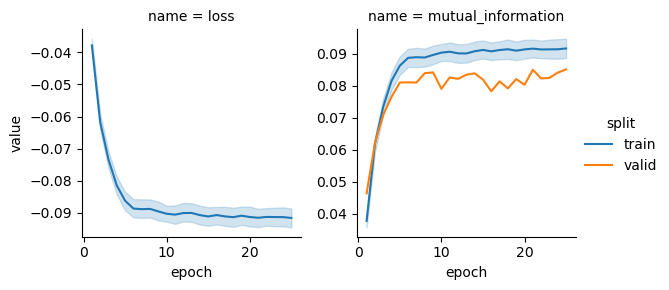

In [96]:
grid = sns.FacetGrid(out['2024_11_20']['HIGH']['model'].train_log,col='name',hue='split',sharey=False)
grid.map(sns.lineplot, 'epoch', 'value')
grid.add_legend()
plt.show()

In [99]:

rows = []
ft = ["fx","ty","tz"]
for moth, cond_dict in out.items():
    for condition, inner_dict in cond_dict.items():
        projs = inner_dict['proj'][0,:]  # projs is a list of length 6
        for axis, value in enumerate(projs):
            # Now, value should be a single number, not a list
            rows.append({'moth': moth, 'condition': condition, 'axis': ft[axis], 'value': value})

df = pd.DataFrame(rows)

In [100]:
df["value_abs"] = np.abs(df["value"])
df

,moth,condition,axis,value,value_abs
0,2024_11_11,HIGH,fx,0.090412,0.090412
1,2024_11_11,HIGH,ty,-0.447545,0.447545
2,2024_11_11,HIGH,tz,-0.340890,0.340890
3,2024_11_11,LOW,fx,-0.049378,0.049378
4,2024_11_11,LOW,ty,0.303415,0.303415
5,2024_11_11,LOW,tz,-0.488861,0.488861
6,2024_11_01,HIGH,fx,-0.030097,0.030097
7,2024_11_01,HIGH,ty,0.408641,0.408641
8,2024_11_01,HIGH,tz,-0.099450,0.099450
9,2024_11_01,LOW,fx,0.000449,0.000449


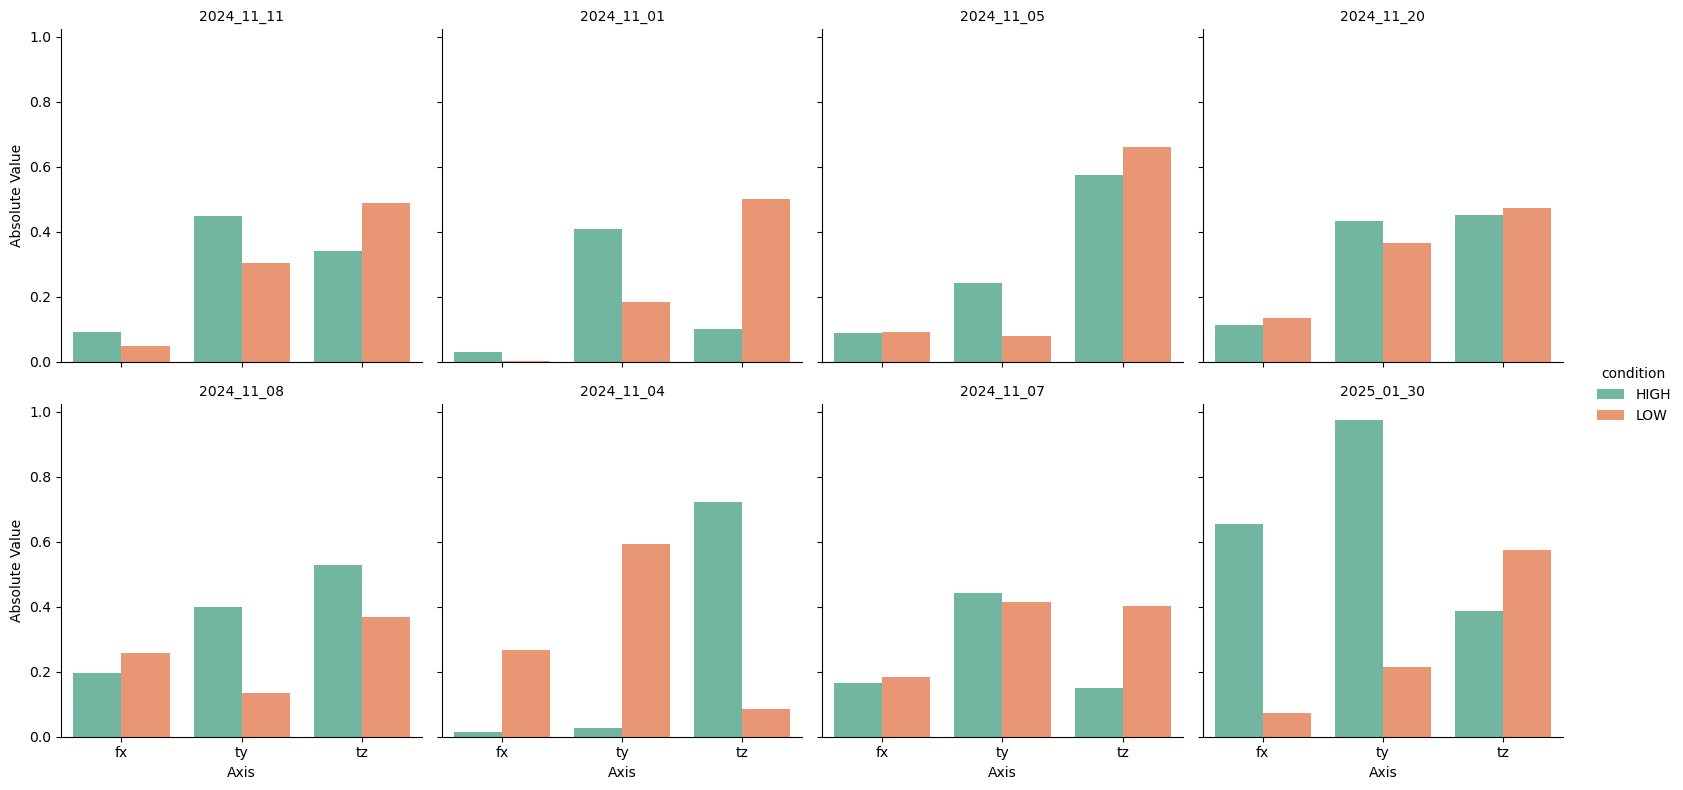

In [101]:
g = sns.catplot(
    data=df,
    kind="bar",
    x="axis", y="value_abs",
    hue="condition",
    col="moth",
    col_wrap=4,         # change depending on how many columns you want
    dodge=True,
    palette="Set2",     # optional, makes it pretty
    height=4, aspect=1
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Axis", "Absolute Value")
g.tight_layout()
plt.show()

In [53]:
outout = {
    '2024_11_08' : out_dict
}

In [3]:
with open('MID_cache.pkl','rb') as f:
    loaded = pickle.load(f)


'/home/doshna/Documents/PHD/data/fatties/Muscle_Time_Series/2024_11_08_HIGH.csv'